# Tensorflow - Handwritten digit classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# read handwritten dataset from keras library 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# size of dataset (28 x28 matrix), become 784 one dimensional array by flattening 2*2 array)
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

# zero - represents black and 255 - represents white (0-255 black to white)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

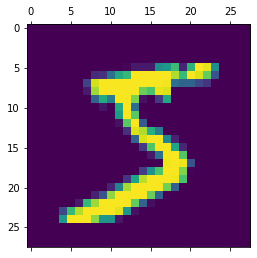

In [8]:
# plt a image of handwritten digits
plt.matshow(X_train[0])


In [9]:
y_train[:9]
# y train contains output 0 to 9 digits

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [10]:
# flatten the X_train and X_test dataset 
X_train.shape

# 60000 rows, 28*28 matrix - flatten 784

(60000, 28, 28)

In [11]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_train_flatten.shape


(60000, 784)

In [12]:
X_test_flatten.shape

(10000, 784)

In [13]:
X_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
   )

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 593us/step - loss: 2.2100 - accuracy: 0.2802
Epoch 2/5
1875/1875 [==============================] - 1s 581us/step - loss: 1.8748 - accuracy: 0.2844
Epoch 3/5
1875/1875 [==============================] - 1s 588us/step - loss: 1.7970 - accuracy: 0.2861
Epoch 4/5
1875/1875 [==============================] - 1s 591us/step - loss: 1.7759 - accuracy: 0.2871
Epoch 5/5
1875/1875 [==============================] - 1s 584us/step - loss: 1.7851 - accuracy: 0.2868


In [19]:
# It can be seen from above output that model accuracy is very low, 
# which may be due to X_train data is not scalled (0 to 255 to be divided by 255, so that it can be brought between 0 to 1)

In [20]:
# Introduce normalisation in the dataset as it is now 1 to 255 , which is affecting model accuracy. to improve model accuracy, 
# divide X_train and X_test by 255, so that values will be between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_train_flatten.shape

(60000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
   )

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 627us/step - loss: 2.2416 - accuracy: 0.6218
Epoch 2/10
1875/1875 [==============================] - 1s 619us/step - loss: 2.0917 - accuracy: 0.7450
Epoch 3/10
1875/1875 [==============================] - 1s 603us/step - loss: 1.9010 - accuracy: 0.7708
Epoch 4/10
1875/1875 [==============================] - 1s 595us/step - loss: 1.7130 - accuracy: 0.7821
Epoch 5/10
1875/1875 [==============================] - 1s 609us/step - loss: 1.5495 - accuracy: 0.7884
Epoch 6/10
1875/1875 [==============================] - 1s 601us/step - loss: 1.4113 - accuracy: 0.7968
Epoch 7/10
1875/1875 [==============================] - 1s 597us/step - loss: 1.2945 - accuracy: 0.8043
Epoch 8/10
1875/1875 [==============================] - 1s 658us/step - loss: 1.1956 - accuracy: 0.8122
Epoch 9/10
1875/1875 [==============================] - 1s 601us/step - loss: 1.1112 - accuracy: 0.8175
Epoch 10/10
1875/1875 [==============================] - 1s 616u

In [24]:
# it can be seen that model accuracy is improved a lot (but not significantly)

In [26]:
# now test on test data
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 457us/step - loss: 0.9876 - accuracy: 0.8387


[0.9875731468200684, 0.838699996471405]

In [27]:
model.predict(X_test_flatten)

array([[0.00598827, 0.00821757, 0.00872418, ..., 0.24357873, 0.01038375,
        0.0449267 ],
       [0.00844666, 0.00845852, 0.05865481, ..., 0.00090072, 0.01128867,
        0.00145572],
       [0.00517732, 0.25914067, 0.02351797, ..., 0.02706894, 0.01822808,
        0.01890489],
       ...,
       [0.00165105, 0.00458995, 0.00482741, ..., 0.02307644, 0.02408078,
        0.042642  ],
       [0.00730366, 0.01217133, 0.00687653, ..., 0.01068169, 0.02683207,
        0.0079774 ],
       [0.02842093, 0.000388  , 0.0173265 , ..., 0.00046676, 0.00238743,
        0.00156125]], dtype=float32)

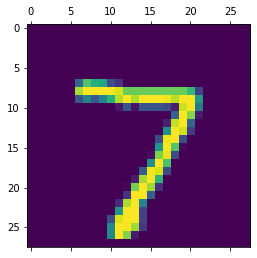

In [29]:
# plot first image predictted 
plt.matshow(X_test[0])

In [30]:
y_predict = model.predict(X_test_flatten)

In [31]:
y_predict[0]
# values are showing fro digit 0 to 9 with values 0 to 1, 

array([0.00598827, 0.00821757, 0.00872418, 0.01404312, 0.02017242,
       0.01321584, 0.0046396 , 0.24357873, 0.01038375, 0.0449267 ],
      dtype=float32)

In [32]:
np.argmax(y_predict[0])

7

In [33]:
y_predict[1]

array([0.00844666, 0.00845852, 0.05865481, 0.02856338, 0.0015597 ,
       0.0186086 , 0.02954781, 0.00090072, 0.01128867, 0.00145572],
      dtype=float32)

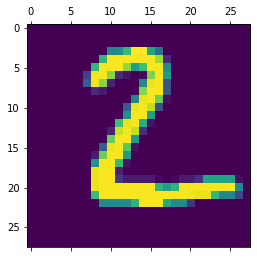

In [34]:
plt.matshow(X_test[1])

In [35]:
y_predict[2]

array([0.00517732, 0.25914067, 0.02351797, 0.02135396, 0.01740402,
       0.02217549, 0.01923975, 0.02706894, 0.01822808, 0.01890489],
      dtype=float32)

In [36]:
np.argmax(y_predict[1])

2

In [39]:
# create np argmax for each y_predict values 
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
# plot confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 912,    1,    4,    7,    0,   10,   35,    1,    9,    1],
       [   0, 1098,    8,    4,    0,    1,    4,    0,   20,    0],
       [  17,   47,  820,   30,   21,    0,   31,   22,   43,    1],
       [   4,   24,   27,  874,    1,    7,    8,   20,   33,   12],
       [   2,   20,    3,    0,  828,    0,   26,    4,    7,   92],
       [  19,   63,    7,  138,   25,  548,   26,   23,   21,   22],
       [  19,   30,   10,    0,   15,   14,  868,    0,    2,    0],
       [   1,   56,   15,    4,   11,    0,    2,  895,    9,   35],
       [  17,   57,   10,   74,   13,   12,   14,   17,  732,   28],
       [  17,   22,    6,   12,   71,    5,    0,   55,    9,  812]])>

Text(69.0, 0.5, 'Truth')

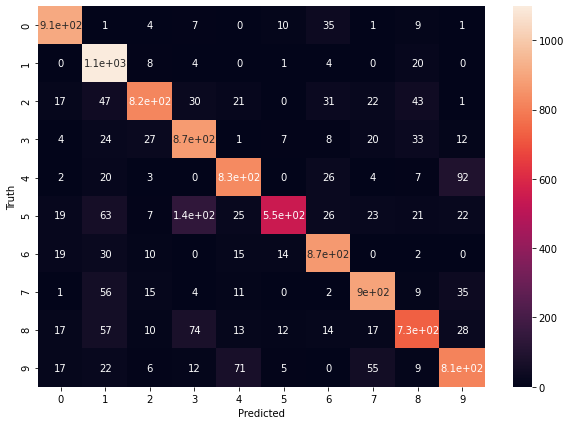

In [44]:
# plot confusion matrix with seaborn lib
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [46]:
# repeat the process with adding hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
   )

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 833us/step - loss: 1.2860 - accuracy: 0.6926
Epoch 2/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.5716 - accuracy: 0.8580
Epoch 3/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.4369 - accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.3817 - accuracy: 0.8952
Epoch 5/10
1875/1875 [==============================] - 2s 841us/step - loss: 0.3525 - accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.3338 - accuracy: 0.9052
Epoch 7/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.3203 - accuracy: 0.9090
Epoch 8/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.3107 - accuracy: 0.9114
Epoch 9/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.3027 - accuracy: 0.9129
Epoch 10/10
1875/1875 [==============================] - 2s 831u

In [49]:
# now test on test data
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 624us/step - loss: 0.2863 - accuracy: 0.9158


[0.28632137179374695, 0.9157999753952026]

In [50]:
y_predict = model.predict(X_test_flatten)

In [51]:
# create np argmax for each y_predict values 
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
# plot confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    5,    2,    0,    7,    7,    2,    3,    0],
       [   0, 1113,    2,    2,    0,    2,    4,    1,   11,    0],
       [  12,   11,  920,   19,    8,    2,   10,    9,   36,    5],
       [   2,    1,   21,  920,    0,   29,    1,   14,   15,    7],
       [   2,    6,    5,    1,  896,    1,   13,    2,    7,   49],
       [   9,    3,    8,   40,    8,  771,   13,    8,   25,    7],
       [  14,    3,    6,    1,    9,   16,  903,    2,    4,    0],
       [   3,   15,   21,    7,    8,    0,    0,  927,    2,   45],
       [   7,   13,    9,   30,   11,   33,   12,    6,  836,   17],
       [  13,   10,    2,   12,   26,    6,    0,   17,    5,  918]])>

Text(69.0, 0.5, 'Truth')

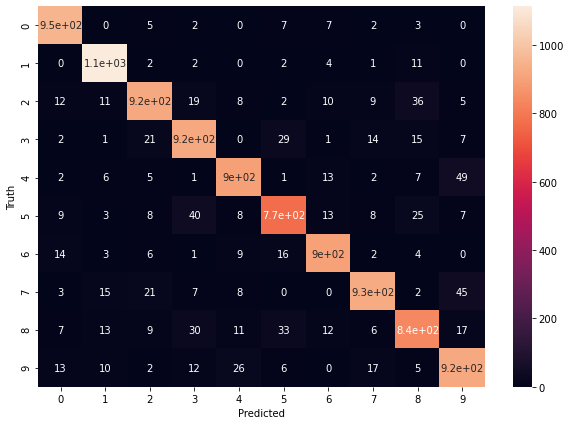

In [53]:
# plot confusion matrix with seaborn lib
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# it can be seen from above matrix that errors reduced.

In [56]:
# Alternative way of predicting without creating flattening of data
# repeat the process with adding hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), 
    keras.layers.Dense(100, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
   )

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 860us/step - loss: 1.3349 - accuracy: 0.6763
Epoch 2/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.5930 - accuracy: 0.8498
Epoch 3/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.4497 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.3896 - accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.3571 - accuracy: 0.9000
Epoch 6/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.3370 - accuracy: 0.9054
Epoch 7/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.3228 - accuracy: 0.9082
Epoch 8/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.3126 - accuracy: 0.9104
Epoch 9/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3042 - accuracy: 0.9133
Epoch 10/10
1875/1875 [==============================] - 2s 848u